# Fashion Mnist Dataset 
* Consisting of a training set of 60,000 examples and a test set of 10,000 examples 
* Each example is a 28x28 grayscale image, associated with a label from 10 classes.
* https://www.kaggle.com/datasets/zalando-research/fashionmnist
## Labels

Each training and test example is assigned to one of the following labels:

* 0 - T-shirt/top
* 1 - Trouser
* 2 - Pullover
* 3 - Dress
* 4 - Coat
* 5 - Sandal
* 6 - Shirt
* 7 - Sneaker
* 8 - Bag
* 9 - Ankle boot

# Import Library

## Environment Library
    • Python = 3.9.12
	• Cuda = 11.2.2
	• Cudnn = 8.1
    • Tensorflow = 2.9.1
    • Keras = 2.9.0
	• Numpy = 1.23.1
	• Pandas = 1.4.3
	• Seaborn = 0.11.2

### When we use Tensorflow-gpu, the following code allows us to see that the system is working correctly

In [1]:
import tensorflow as tf
tf.device("/device:GPU:1")
device_name = tf.test.gpu_device_name()
if device_name != ("/device:GPU:0"):
    raise SystemError("GPU device not found")
print("Found GPU at: {}".format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

import warnings
warnings.simplefilter("ignore")

# Load Dataset and preparation for training 

In [3]:
# Load Train Data and first view
train = pd.read_csv("fashion-mnist_train.csv")
print(train.shape)
train.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Load Test Data and first view
test = pd.read_csv("fashion-mnist_test.csv")
print(test.shape)
test.head()

(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# For y_train, the label column from the train dataset is used, then the label column for x_train is dropped.
Y = train["label"]
X = train.drop(labels = ["label"],axis = 1) 

# Same thing for the test data
y_test = test["label"]
x_test = test.drop(labels = ["label"],axis = 1) 

In [6]:
# divide by 255, gray scale
X = X/255
x_test = x_test/255
X.head()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


##  Visualization Some Samples and Number of Digit Classes

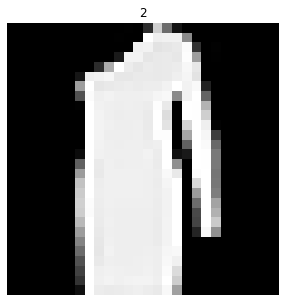

In [7]:
# plot some samples
plt.figure(figsize=(5,5))
img = [X.iloc[34]]
img = np.reshape(img, (28, 28))
plt.imshow(img,cmap='gray')
plt.title(Y.iloc[34])
plt.axis("off")
plt.show()

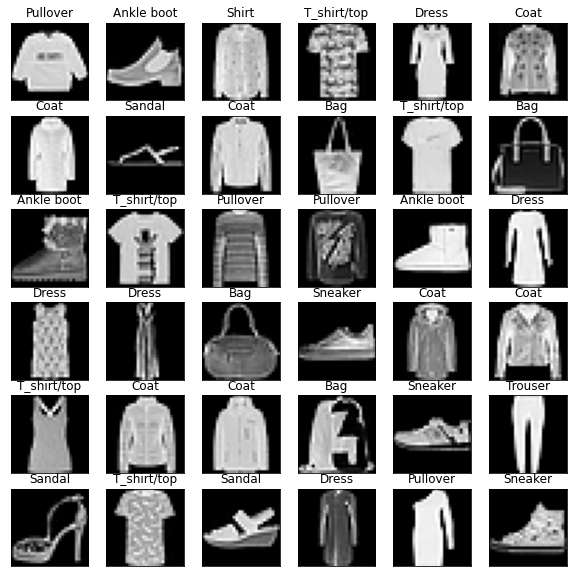

In [8]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = [X.iloc[i]]
    img = np.reshape(img, (28, 28))
    plt.imshow(img,cmap='gray')
    label_index = int(Y[i])
    plt.title(class_names[label_index])
plt.show()

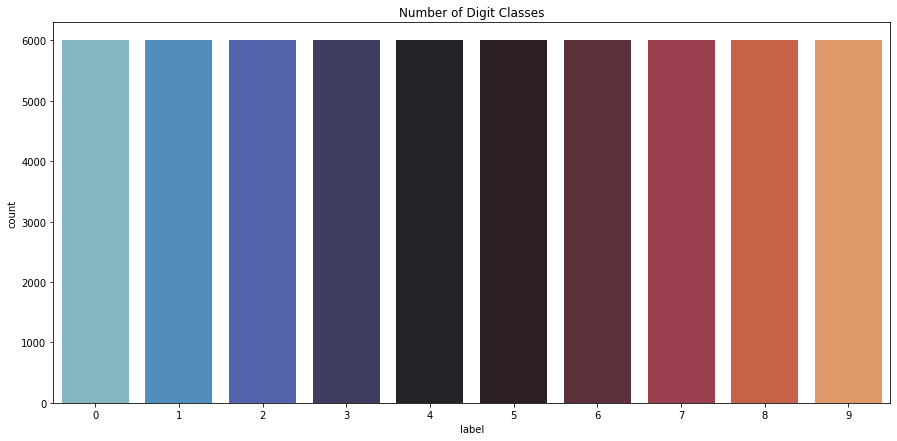

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

In [9]:
# visualize number of digit classes
plt.figure(figsize=(15,7))
sns.countplot(Y,palette="icefire")
plt.title("Number of Digit Classes")
plt.show()
Y.value_counts()

## Create x_train, y_train, x_val , y_val arrays
* % 85 train data
* % 15 validation data 

In [10]:
# This library was especially used for train and validation separation. Therefore it has been implanted here
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15, random_state=42)

In [11]:
print(X_val.shape)
X_train.values.shape

(9000, 784)


(51000, 784)

* 90000 sample for validation
* 51000 sample for test

### In preparation for CNN, we need to specify the color scale while reshaping. We use the 3rd dimension as the color scale
* 1 is gray scale

In [12]:
x_train = X_train.values.reshape(-1,28,28,1)
x_val = X_val.values.reshape(-1,28,28,1)

In [13]:
x_train.shape

(51000, 28, 28, 1)

## One-Hot-Encoding

In [14]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(Y_train, num_classes = 10)
y_val = to_categorical(Y_val,num_classes=10)

In [15]:
print("x_train shape",x_train.shape)
print("x_test shape",x_val.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

x_train shape (51000, 28, 28, 1)
x_test shape (9000, 28, 28, 1)
y_train shape (51000, 10)
y_test shape (9000, 10)


#  Model Create

## Import Keras library for Create CNN 

In [16]:
# Import Necessary CNN Library(Keras)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [17]:
model = Sequential()# Create Model

# first convolutional layer 
# 8 filter and each filter size 5,5 
# we use same padding and activation is Relu
model.add(Conv2D(filters=8, kernel_size=(5,5), padding="Same", activation="relu", input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))

# second convolutional layer 
# 8 filter and each filter size 5,5 
# we use same padding and activation is Relu
model.add(Conv2D(filters=16, kernel_size=(5,5), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.10))

# thirth convolutional layer 
# 8 filter and each filter size 3,3 
# we use same padding and activation is Relu
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.10))

# Create neural network
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(150, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(50, activation="relu"))
model.add(Dense(10,activation="softmax"))

In [18]:
# create Adam optimizer
optimizer = Adam(learning_rate= 0.001, beta_1 = 0.9, beta_2= 0.999)

In [19]:
model.compile( optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [20]:
epochs = 100  # for better result increase the epochs
batch_size = 3500

In [21]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [22]:
# Fit the model
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/100
14/14 [==============================] - 19s 741ms/step - loss: 2.1711 - accuracy: 0.1827 - val_loss: 1.7253 - val_accuracy: 0.3489
Epoch 2/100
14/14 [==============================] - 11s 778ms/step - loss: 1.6683 - accuracy: 0.3334 - val_loss: 1.2628 - val_accuracy: 0.5456
Epoch 3/100
14/14 [==============================] - 11s 762ms/step - loss: 1.3506 - accuracy: 0.4531 - val_loss: 1.0256 - val_accuracy: 0.5944
Epoch 4/100
14/14 [==============================] - 11s 751ms/step - loss: 1.1568 - accuracy: 0.5405 - val_loss: 0.8658 - val_accuracy: 0.6614
Epoch 5/100
14/14 [==============================] - 10s 741ms/step - loss: 1.0267 - accuracy: 0.6042 - val_loss: 0.7812 - val_accuracy: 0.6800
Epoch 6/100
14/14 [==============================] - 11s 796ms/step - loss: 0.9314 - accuracy: 0.6462 - val_loss: 0.7029 - val_accuracy: 0.7116
Epoch 7/100
14/14 [==============================] - 10s 713ms/step - loss: 0.8673 - accuracy: 0.6706 - val_loss: 0.6872 - val_accuracy:

In [23]:
#model save
model.save_weights("Fashion_Mnist_Dataset.h5")

## Ploting metrics

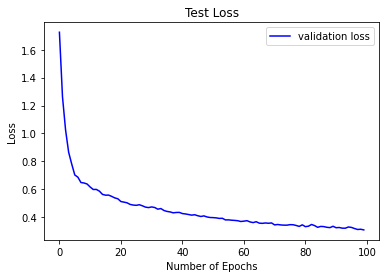

In [24]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Train - Accuracy')

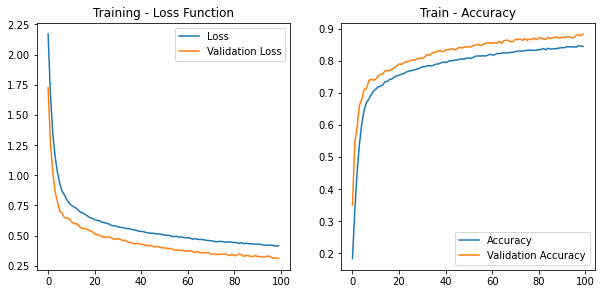

In [25]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

282/282 [==============================] - 1s 4ms/step


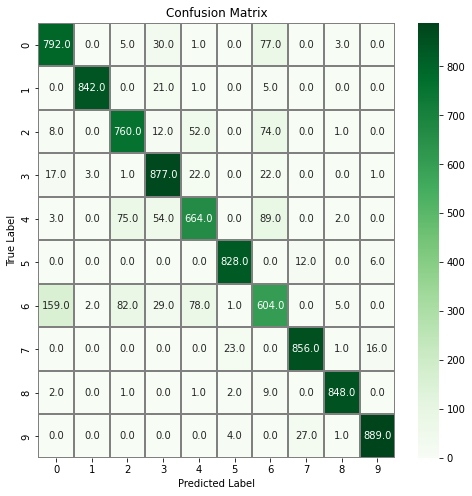

In [26]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(x_val)
y_pred_class = np.argmax(y_pred,axis=1)
y_true = np.argmax(y_val,axis=1)
confusion_mtx = confusion_matrix(y_true,y_pred_class)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Testing Model With Test Dataset

In [27]:
x_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.121569,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.0,0.521569,0.878431,0.870588,0.219608,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [28]:
x_test.shape

(10000, 784)

In [29]:
y_test.shape

(10000,)

In [30]:
x_test_reshape = x_test.values.reshape(-1,28,28,1)

In [31]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_test_encode = to_categorical(y_test, num_classes = 10)

In [32]:
print("x_train shape",x_test_reshape.shape)
print("y_train shape",y_test_encode.shape)

x_train shape (10000, 28, 28, 1)
y_train shape (10000, 10)


313/313 [==============================] - 1s 3ms/step


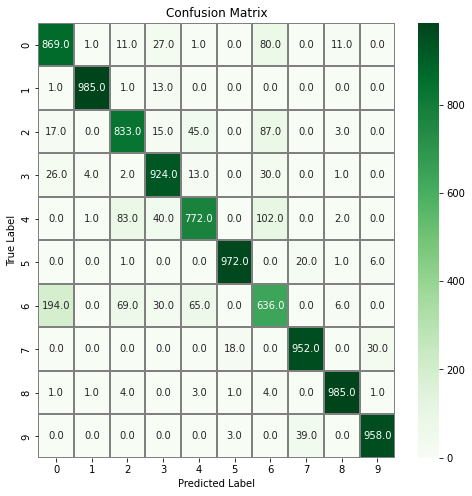

In [33]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test_reshape)
y_pred_class = np.argmax(y_pred,axis=1)
y_true = np.argmax(y_test_encode,axis=1)
confusion_mtx = confusion_matrix(y_true,y_pred_class)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [34]:
test_loss, test_acc = model.evaluate(x_test_reshape,  y_test_encode, verbose=2)

313/313 - 1s - loss: 0.2919 - accuracy: 0.8886 - 703ms/epoch - 2ms/step


In [36]:
print(test_acc)

0.8885999917984009
